In [1]:
!pip install soccerdata

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[06/07/25 01:09:09] INFO     No custom team name replacements found. You can configure these in       ]8;id=867419;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=749839;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=982133;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=532070;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#195\195]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2025)
print(fbref.__doc__)

[06/07/25 01:09:11] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=716139;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=15198;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=891696;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=409313;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=512974;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=316931;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-289   
                                    Bernard             BRA  FW,MF  32-271   
                                    Brahian Palacios    COL     MF  22-194   
                                    Caio Paulista       BRA     DF  27-026   
                                    Fausto Vera         ARG     MF  25-072   

                                                      born Playing Time  \
                                                                     MP   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998            7   
                                    Bernard           1992            9   
                                    Brahian Palacios  2002            1   
                                    Caio Paulista     1998            4   
                                    Fausto Vera       2000            7   

                                                                       \
                                                     Starts  Min  90s   
league      season team             player                              
BRA-Serie A 2526   Atlético Mineiro Alan Franco           7  585  6.5   
                                    Bernard               1  215  2.4   
                                    Brahian Palacios      0    8  0.1   
                                    Caio Paulista         3  208  2.3   
                                    Fausto Vera           5  439  4.9   

                                                     Performance      ...  \
                                                             Gls Ast  ...   
league      season team             player                            ...   
BRA-Serie A 2526   Atlético Mineiro Alan Franco                0   0  ...   
                                    Bernard                    0   0  ...   
                                    Brahian Palacios           0   0  ...   
                                    Caio Paulista              0   0  ...   
                                    Fausto Vera                1   0  ...   

                                                     Per 90 Minutes       \
                                                                Gls  Ast   
league      season team             player                                 
BRA-Serie A 2526   Atlético Mineiro Alan Franco                 0.0  0.0   
                                    Bernard                     0.0  0.0   
                                    Brahian Palacios            0.0  0.0   
                                    Caio Paulista               0.0  0.0   
                                    Fausto Vera                0.21  0.0   

                                                                               \
                                                       G+A  G-PK G+A-PK    xG   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0.0   0.0    0.0  0.01   
                                    Bernard            0.0   0.0    0.0  0.02   
                                    Brahian Palacios   0.0   0.0    0.0   0.0   
                                    Caio Paulista      0.0   0.0    0.0  0.15   
                                    Fausto Vera       0.21  0.21   0.21  0.09   

                                                                         \
                                                       xAG xG+xAG  npxG   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0.0   0.01  0.01   
                                    Bernard           0.18    0.2  

In [6]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born Playing Time         ... Per 90 Minutes                   \
                          MP Starts  ...            Gls  Ast   G+A  G-PK   
0  26-289  1998            7      7  ...            0.0  0.0   0.0   0.0   
1  32-271  1992            9      1  ...            0.0  0.0   0.0   0.0   
2  22-194  2002            1      0  ...            0.0  0.0   0.0   0.0   
3  27-026  1998            4      3  ...            0.0  0.0   0.0   0.0   
4  25-072  2000            7      5  ...           0.21  0.0  0.21  0.21   

                                            
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0    0.0  0.01   0.0   0.01  0.01     0.01  
1    0.0  0.02  0.18    0.2  0.02      0.2  
2    0.0   0.0   0.0    0.0   0.0      0.0  
3    0.0  0.15  0.04   0.19  0.15     0.19  
4   0.21  0.09  0.03   0.12  0.09     0.12  

[5 rows x 37 columns]

In [7]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

[06/07/25 01:09:19] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=156565;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=742569;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=496219;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=969853;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-289   
                                    Bernard             BRA  FW,MF  32-271   
                                    Brahian Palacios    COL     MF  22-194   
                                    Caio Paulista       BRA     DF  27-026   
                                    Fausto Vera         ARG     MF  25-072   

                                                      born  90s Performance  \
                                                                       CrdY   
league      season team             player                                    
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998  6.5           1   
                                    Bernard           1992  2.4           1   
                                    Brahian Palacios  2002  0.1           0   
                                    Caio Paulista     1998  2.3           1   
                                    Fausto Vera       2000  4.9           1   

                                                                         ...  \
                                                     CrdR 2CrdY Fls Fld  ...   
league      season team             player                               ...   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         0     0   8   3  ...   
                                    Bernard             0     0   5   3  ...   
                                    Brahian Palacios    0     0   0   0  ...   
                                    Caio Paulista       0     0   4   2  ...   
                                    Fausto Vera         0     0   6   3  ...   

                                                                               \
                                                     Crs Int TklW PKwon PKcon   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco        2   2   10     0     0   
                                    Bernard            6   0    3     0     0   
                                    Brahian Palacios   0   0    0     0     0   
                                    Caio Paulista      6   3    4     0     0   
                                    Fausto Vera        2   4    6     0     0   

                                                              Aerial Duels  \
                                                     OG Recov          Won   
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco       0    21            8   
                                    Bernard           0    13            1   
                                    Brahian Palacios  0     1            0   
                                    Caio Paulista     0    10            3   
                                    Fausto Vera       0    19            3   

                                                                  
                                                     Lost   Won%  
league      season team             player                        
BRA-Serie A 2526   Atlético Mineiro Alan Franco         1   88.9  
                                    Bernard             0  100.0  
                                    Brahian Palacios    0   <NA>  
                                    Caio Paulista       1   75.0  
                                    Fausto Vera         5   37.5  

[5 rows x 21 columns]

In [8]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born  90s Performance  ...                                    \
                            CrdY  ... Crs Int TklW PKwon PKcon OG Recov   
0  26-289  1998  6.5           1  ...   2   2   10     0     0  0    21   
1  32-271  1992  2.4           1  ...   6   0    3     0     0  0    13   
2  22-194  2002  0.1           0  ...   0   0    0     0     0  0     1   
3  27-026  1998  2.3           1  ...   6   3    4     0     0  0    10   
4  25-072  2000  4.9           1  ...   2   4    6     0     0  0    19   

  Aerial Duels              
           Won Lost   Won%  
0            8    1   88.9  
1            1    0  100.0  
2            0    0   <NA>  
3            3    1   75.0  
4            3    5   37.5  

[5 rows x 25 columns]

In [9]:
player_season_def = fbref.read_player_season_stats(stat_type="defense")
player_season_def.head()

[06/07/25 01:09:27] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=128037;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=110427;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=968930;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=252808;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-290   
                                    Bernard             BRA  FW,MF  32-272   
                                    Brahian Palacios    COL     MF  22-195   
                                    Caio Paulista       BRA     DF  27-027   
                                    Fausto Vera         ARG     MF  25-073   

                                                      born  90s Tackles       \
                                                                    Tkl TklW   
league      season team             player                                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998  6.5      13   10   
                                    Bernard           1992  2.4       5    3   
                                    Brahian Palacios  2002  0.1       0    0   
                                    Caio Paulista     1998  2.3       9    4   
                                    Fausto Vera       2000  4.9       9    6   

                                                                              \
                                                     Def 3rd Mid 3rd Att 3rd   
league      season team             player                                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco            5       4       4   
                                    Bernard                1       3       1   
                                    Brahian Palacios       0       0       0   
                                    Caio Paulista          4       2       3   
                                    Fausto Vera            3       6       0   

                                                      ... Challenges         \
                                                      ...        Att   Tkl%   
league      season team             player            ...                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco       ...          7  100.0   
                                    Bernard           ...          5   60.0   
                                    Brahian Palacios  ...          0   <NA>   
                                    Caio Paulista     ...          7   85.7   
                                    Fausto Vera       ...         12   50.0   

                                                          Blocks         Int  \
                                                     Lost Blocks Sh Pass       
league      season team             player                                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco         0      2  0    2   2   
                                    Bernard             2      2  0    2   0   
                                    Brahian Palacios    0      0  0    0   0   
                                    Caio Paulista       1      3  2    1   3   
                                    Fausto Vera         6      4  2    2   4   

                                                     Tkl+Int Clr Err  
                                                                      
league      season team             player                            
BRA-Serie A 2526   Atlético Mineiro Alan Franco           15   9   0  
                                    Bernard                5   1   0  
                                    Brahian Palacios       0   0   0  
                                    Caio Paulista         12   9   0  
                                    Fausto Vera           13   8   0  

[5 rows x 21 columns]

In [10]:
player_season_def = player_season_def.reset_index()
print(player_season_def.columns)
player_season_def.head()

MultiIndex([(    'league',        ''),
            (    'season',        ''),
            (      'team',        ''),
            (    'player',        ''),
            (    'nation',        ''),
            (       'pos',        ''),
            (       'age',        ''),
            (      'born',        ''),
            (       '90s',        ''),
            (   'Tackles',     'Tkl'),
            (   'Tackles',    'TklW'),
            (   'Tackles', 'Def 3rd'),
            (   'Tackles', 'Mid 3rd'),
            (   'Tackles', 'Att 3rd'),
            ('Challenges',     'Tkl'),
            ('Challenges',     'Att'),
            ('Challenges',    'Tkl%'),
            ('Challenges',    'Lost'),
            (    'Blocks',  'Blocks'),
            (    'Blocks',      'Sh'),
            (    'Blocks',    'Pass'),
            (       'Int',        ''),
            (   'Tkl+Int',        ''),
            (       'Clr',        ''),
            (       'Err',        '')],
           )


league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born  90s Tackles  ... Challenges             Blocks         Int  \
                         Tkl  ...        Att   Tkl% Lost Blocks Sh Pass       
0  26-290  1998  6.5      13  ...          7  100.0    0      2  0    2   2   
1  32-272  1992  2.4       5  ...          5   60.0    2      2  0    2   0   
2  22-195  2002  0.1       0  ...          0   <NA>    0      0  0    0   0   
3  27-027  1998  2.3       9  ...          7   85.7    1      3  2    1   3   
4  25-073  2000  4.9       9  ...         12   50.0    6      4  2    2   4   

  Tkl+Int Clr Err  
                   
0      15   9   0  
1       5   1   0  
2       0   0   0  
3      12   9   0  
4      13   8   0  

[5 rows x 25 columns]

In [11]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(col).strip() for col in player_season_misc.columns]
player_season_def.columns = ['_'.join(col).strip() for col in player_season_def.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_def.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [12]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','age_','Playing Time_Min','Progression_PrgC', 'Progression_PrgP','Expected_xAG',]
]
df_misc_selected = player_season_misc[
    ['player_', 'team_', 'Aerial Duels_Won%', 'Aerial Duels_Won', 'Aerial Duels_Lost','Performance_Fls','Performance_CrdY','Performance_CrdR','Performance_2CrdY','Performance_Crs',]
]
df_def_selected = player_season_def[
    ['player_', 'team_','Challenges_Tkl', 'Challenges_Att','Challenges_Tkl%','Int_', 'Err_']
]

# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_misc_selected, on=['player_', 'team_'], how='inner')
df_merged = pd.merge(df_merged_1, df_def_selected, on=['player_', 'team_'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

            player_             team_   pos_    age_  Playing Time_Min  \
0       Alan Franco  Atlético Mineiro     MF  26-289               585   
1           Bernard  Atlético Mineiro  FW,MF  32-271               215   
2  Brahian Palacios  Atlético Mineiro     MF  22-194                 8   
3     Caio Paulista  Atlético Mineiro     DF  27-026               208   
4       Fausto Vera  Atlético Mineiro     MF  25-072               439   

   Progression_PrgC  Progression_PrgP  Expected_xAG  Aerial Duels_Won%  \
0                 2                22           0.0               88.9   
1                11                23           0.4              100.0   
2                 0                 0           0.0               <NA>   
3                 6                17           0.1               75.0   
4                 5                22           0.1               37.5   

   Aerial Duels_Won  ...  Performance_Fls  Performance_CrdY  Performance_CrdR  \
0                 8  ...     

In [13]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Meias (MF), Atacantes(FW)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|MF|FW', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())


          player_             team_ pos_    age_  Playing Time_Min  \
13  Júnior Alonso  Atlético Mineiro   DF  32-117               922   
15         Lyanco  Atlético Mineiro   DF  28-125               718   
16       Natanael  Atlético Mineiro   DF  23-152               803   
28   David Duarte             Bahia   DF  30-133               708   
34       Gilberto             Bahia   DF  32-091               716   

    Progression_PrgC  Progression_PrgP  Expected_xAG  Aerial Duels_Won%  \
13                11                58           0.1               63.2   
15                 8                35           0.1               65.5   
16                11                28           0.7               40.0   
28                 2                22           0.2               69.4   
34                14                27           0.5               47.8   

    Aerial Duels_Won  ...  Performance_Fls  Performance_CrdY  \
13                24  ...               11                 2   


In [14]:
# Selecionar as colunas desejadas para análise
Lat = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('age_'),
    ('Playing Time_Min'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Expected_xAG'),
    ('Aerial Duels_Won%'),
    ('Aerial Duels_Won'),
    ('Aerial Duels_Lost'),
    ('Performance_Fls'),
    ('Performance_CrdY'),
    ('Performance_CrdR'),
    ('Performance_2CrdY'),
    ('Performance_Crs'),
    ('Challenges_Tkl'),
    ('Challenges_Att'),
    ('Challenges_Tkl%'),
    ('Int_'),
    ('Err_'),
]]

# Renomear as colunas para facilitar o uso
Lat.columns = ['jogador','time','posicao','idade', 'Minutos', 'Prgc', 'PrgP','xAG','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Lat.head())


# Criar a nova coluna 'Aerial Duels ' no formato "50% (10/10)"
Lat['Aerial Duels '] = (
    Lat['Aerial Duel%'].astype(str) + '% (' +
    Lat['Aerial Duel Won'].astype(str) + '/' +
    Lat['Aerial Duel Lost'].astype(str) + ')')
# Remover jogadores com todas as métricas iguais a 0
Lat = Lat[(Lat[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls','Desarmes Totais','Desarmes%','Interceptacao','Desarmes Certos','Cross',]] != 0).any(axis=1)]

# Exportar o dataframe para um arquivo CSV
Lat.to_csv('Lat_data.csv', index=False, encoding='utf-8-sig')

# Exibir as primeiras linhas para conferir
Lat.head


          jogador              time posicao   idade  Minutos  Prgc  PrgP  xAG  \
13  Júnior Alonso  Atlético Mineiro      DF  32-117      922    11    58  0.1   
15         Lyanco  Atlético Mineiro      DF  28-125      718     8    35  0.1   
16       Natanael  Atlético Mineiro      DF  23-152      803    11    28  0.7   
28   David Duarte             Bahia      DF  30-133      708     2    22  0.2   
34       Gilberto             Bahia      DF  32-091      716    14    27  0.5   

    Aerial Duel%  Aerial Duel Won  ...  Fouls  Yellow Card  Red Card  \
13          63.2               24  ...     11            2         0   
15          65.5               19  ...     17            6         2   
16          40.0                8  ...     10            0         0   
28          69.4               25  ...      6            1         0   
34          47.8               11  ...      7            2         0   

    2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Desarmes%  \
13     

<bound method NDFrame.head of             jogador              time posicao   idade  Minutos  Prgc  PrgP  \
13    Júnior Alonso  Atlético Mineiro      DF  32-117      922    11    58   
15           Lyanco  Atlético Mineiro      DF  28-125      718     8    35   
16         Natanael  Atlético Mineiro      DF  23-152      803    11    28   
28     David Duarte             Bahia      DF  30-133      708     2    22   
34         Gilberto             Bahia      DF  32-091      716    14    27   
..              ...               ...     ...     ...      ...   ...   ...   
509  Paulo Henrique     Vasco da Gama      DF  28-316      803    25    33   
516       Claudinho           Vitória      DF  24-255      695    26    35   
523        Jamerson           Vitória      DF  26-270      982    33    41   
529    Lucas Halter           Vitória      DF  25-035      990     6    27   
539       Zé Marcos           Vitória      DF  27-125      675     4    30   

     xAG  Aerial Duel%  Aerial Duel Won  ...  Yellow Card  Red Card  \
13   0.1          63.2               24  ...            2         0   
15   0.1          65.5               19  ...            6         2   
16   0.7          40.0                8  ...            0         0   
28   0.2          69.4               25  ...            1         0   
34   0.5          47.8               11  ...            2         0   
..   ...           ...              ...  ...          ...       ...   
509  1.2          50.0               11  ...            4         0   
516  0.9          44.4                4  ...            4         0   
523  1.0          60.0               12  ...            0         0   
529  0.0          63.6               14  ...            2         0   
539  0.0          65.2               15  ...            1         0   

     2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Desarmes%  \
13               0      4                5               10       50.0   
15               2      1                7               11       63.6   
16               0     24                9               17       52.9   
28               0      0                1                4       25.0   
34               0     14               13               20       65.0   
..             ...    ...              ...              ...        ...   
509              0     36               19               29       65.5   
516              0     37               10               17       58.8   
523              0     62               11               18       61.1   
529              0      0                9               13       69.2   
539              0      1                3                3      100.0   

     Interceptacao  Erros  Aerial Duels   
13              10      0  63.2% (24/14)  
15              22      3  65.5% (19/10)  
16              13      0   40.0% (8/12)  
28               7      0  69.4% (25/11)  
34               4      2  47.8% (11/12)  
..             ...    ...            ...  
509              6      1  50.0% (11/11)  
516              8      1    44.4% (4/5)  
523             12      0   60.0% (12/8)  
529              3      0   63.6% (14/8)  
539              5      0   65.2% (15/8)  

[64 rows x 22 columns]>

### **2. Criar modelos de classificação para  (LATERAIS)**

In [15]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Lat[['Prgc', 'PrgP','xAG','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Interceptacao','Erros']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=6, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Lat['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Lat[['Prgc', 'PrgP','xAG','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Interceptacao','Erros']])

     Prgc  PrgP  xAG  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  \
13     11    58  0.1               24                14     11            2   
15      8    35  0.1               19                10     17            6   
16     11    28  0.7                8                12     10            0   
28      2    22  0.2               25                11      6            1   
34     14    27  0.5               11                12      7            2   
..    ...   ...  ...              ...               ...    ...          ...   
509    25    33  1.2               11                11     14            4   
516    26    35  0.9                4                 5      8            4   
523    33    41  1.0               12                 8      9            0   
529     6    27  0.0               14                 8      5            2   
539     4    30  0.0               15                 8      5            1   

     Red Card  2 Yellow Card  Cross  Desarmes Certo

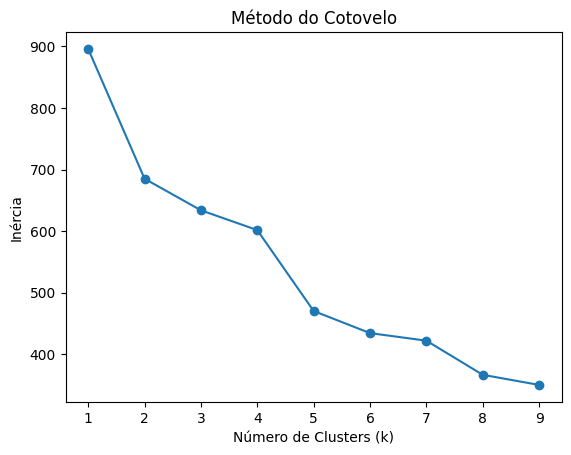

In [16]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [17]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [18]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Lat.groupby('Cluster').agg({col: 'mean' for col in Lat.select_dtypes(include=['number']).columns})
print(cluster_summary)

            Minutos       Prgc       PrgP       xAG  Aerial Duel%  \
Cluster                                                             
0        897.357143   6.857143  31.285714  0.178571     63.478571   
1             718.0        8.0       35.0       0.1          65.5   
2        848.666667       15.0  64.666667  1.166667     64.266667   
3        874.923077  19.384615  45.307692  1.269231     50.123077   
4           802.125      4.125       27.5     0.125      64.29375   
5        745.235294  14.058824  31.941176  0.558824     43.147059   

         Aerial Duel Won  Aerial Duel Lost      Fouls  Yellow Card  Red Card  \
Cluster                                                                        
0                   25.0         14.714286  10.142857     1.928571       0.0   
1                   19.0              10.0       17.0          6.0       2.0   
2              11.666667          5.666667       15.0     1.333333       0.0   
3              10.461538         10.076923  12.

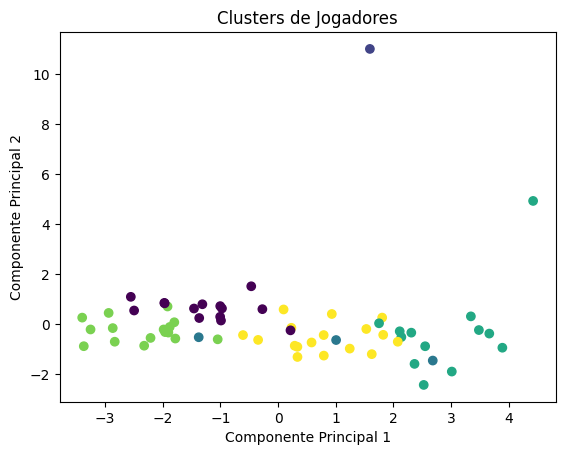

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [20]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = Lat.select_dtypes(include=np.number).columns
correlation_matrix = Lat[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                   Minutos      Prgc      PrgP       xAG  Aerial Duel%  \
Minutos           1.000000 -0.011326  0.317906 -0.024491      0.147501   
Prgc             -0.011326  1.000000  0.414185  0.618114     -0.353422   
PrgP              0.317906  0.414185  1.000000  0.333559     -0.026698   
xAG              -0.024491  0.618114  0.333559  1.000000     -0.331179   
Aerial Duel%      0.147501 -0.353422 -0.026698 -0.331179      1.000000   
Aerial Duel Won   0.402929 -0.448018 -0.116638 -0.448675      0.685067   
Aerial Duel Lost  0.389928 -0.084782 -0.088423 -0.195286     -0.230118   
Fouls             0.066725  0.421848  0.258718  0.384628     -0.187968   
Yellow Card      -0.182190 -0.040425 -0.083213 -0.056404     -0.152259   
Red Card         -0.073315 -0.046009  0.053037 -0.077115     -0.004801   
2 Yellow Card    -0.073315 -0.046009  0.053037 -0.077115     -0.004801   
Cross             0.021120  0.783143  0.311899  0.768773     -0.442820   
Desarmes Certos   0.143900  0.486621  

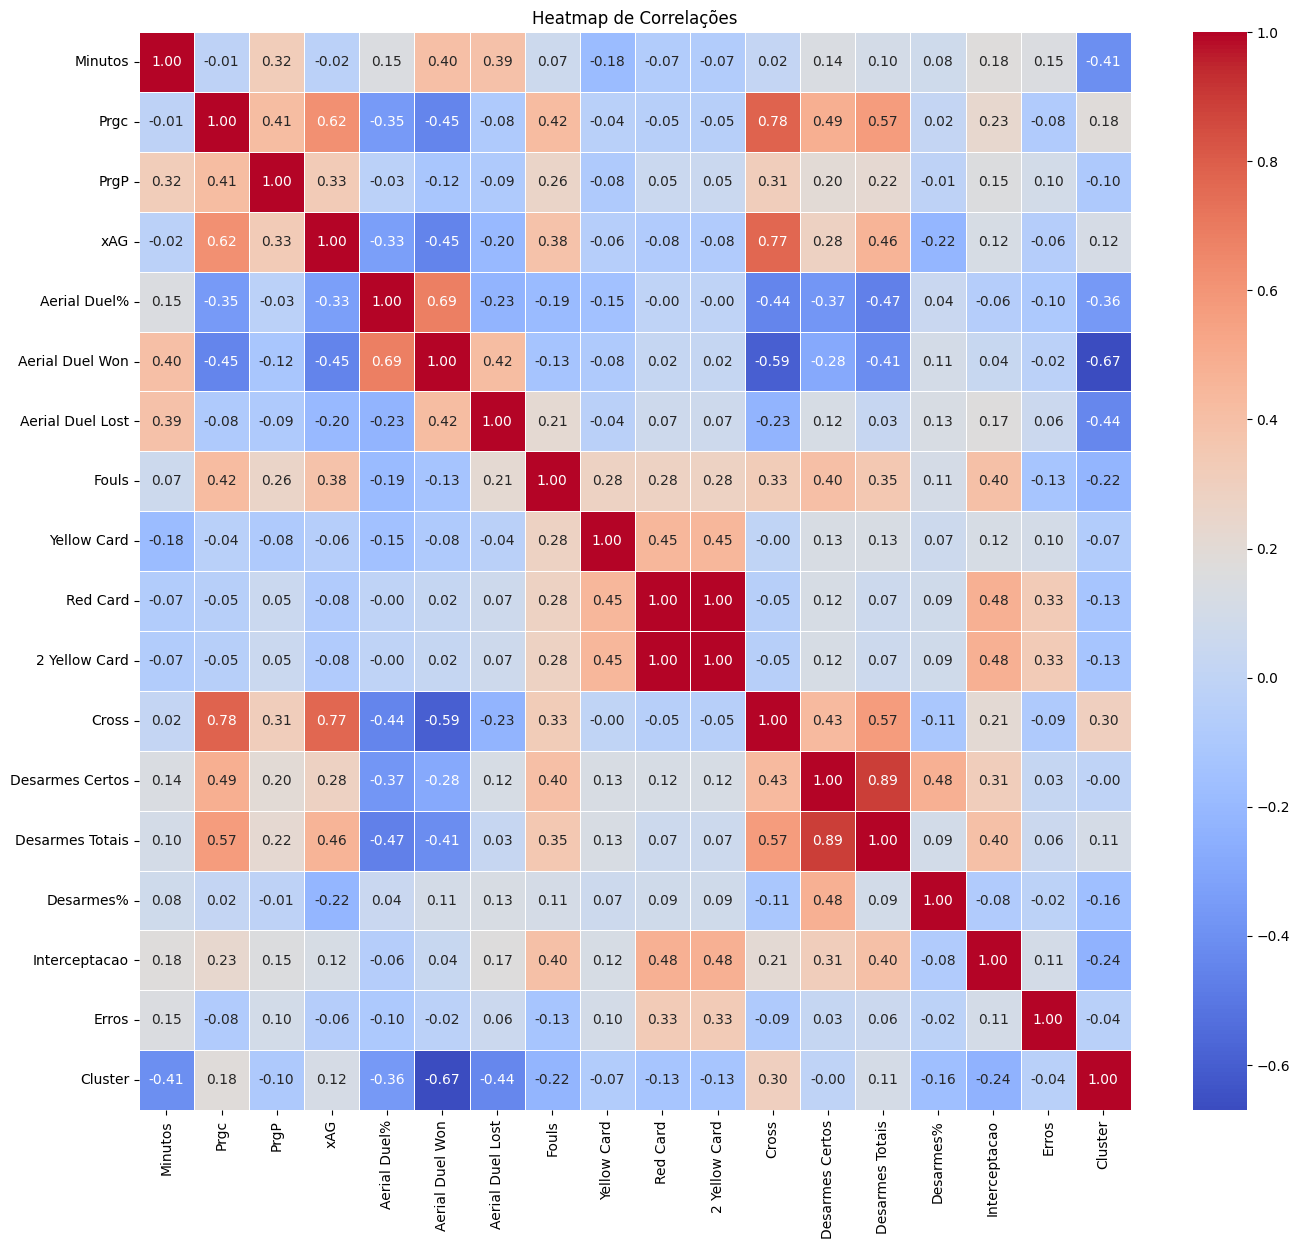

In [21]:
plt.figure(figsize=(16, 14))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

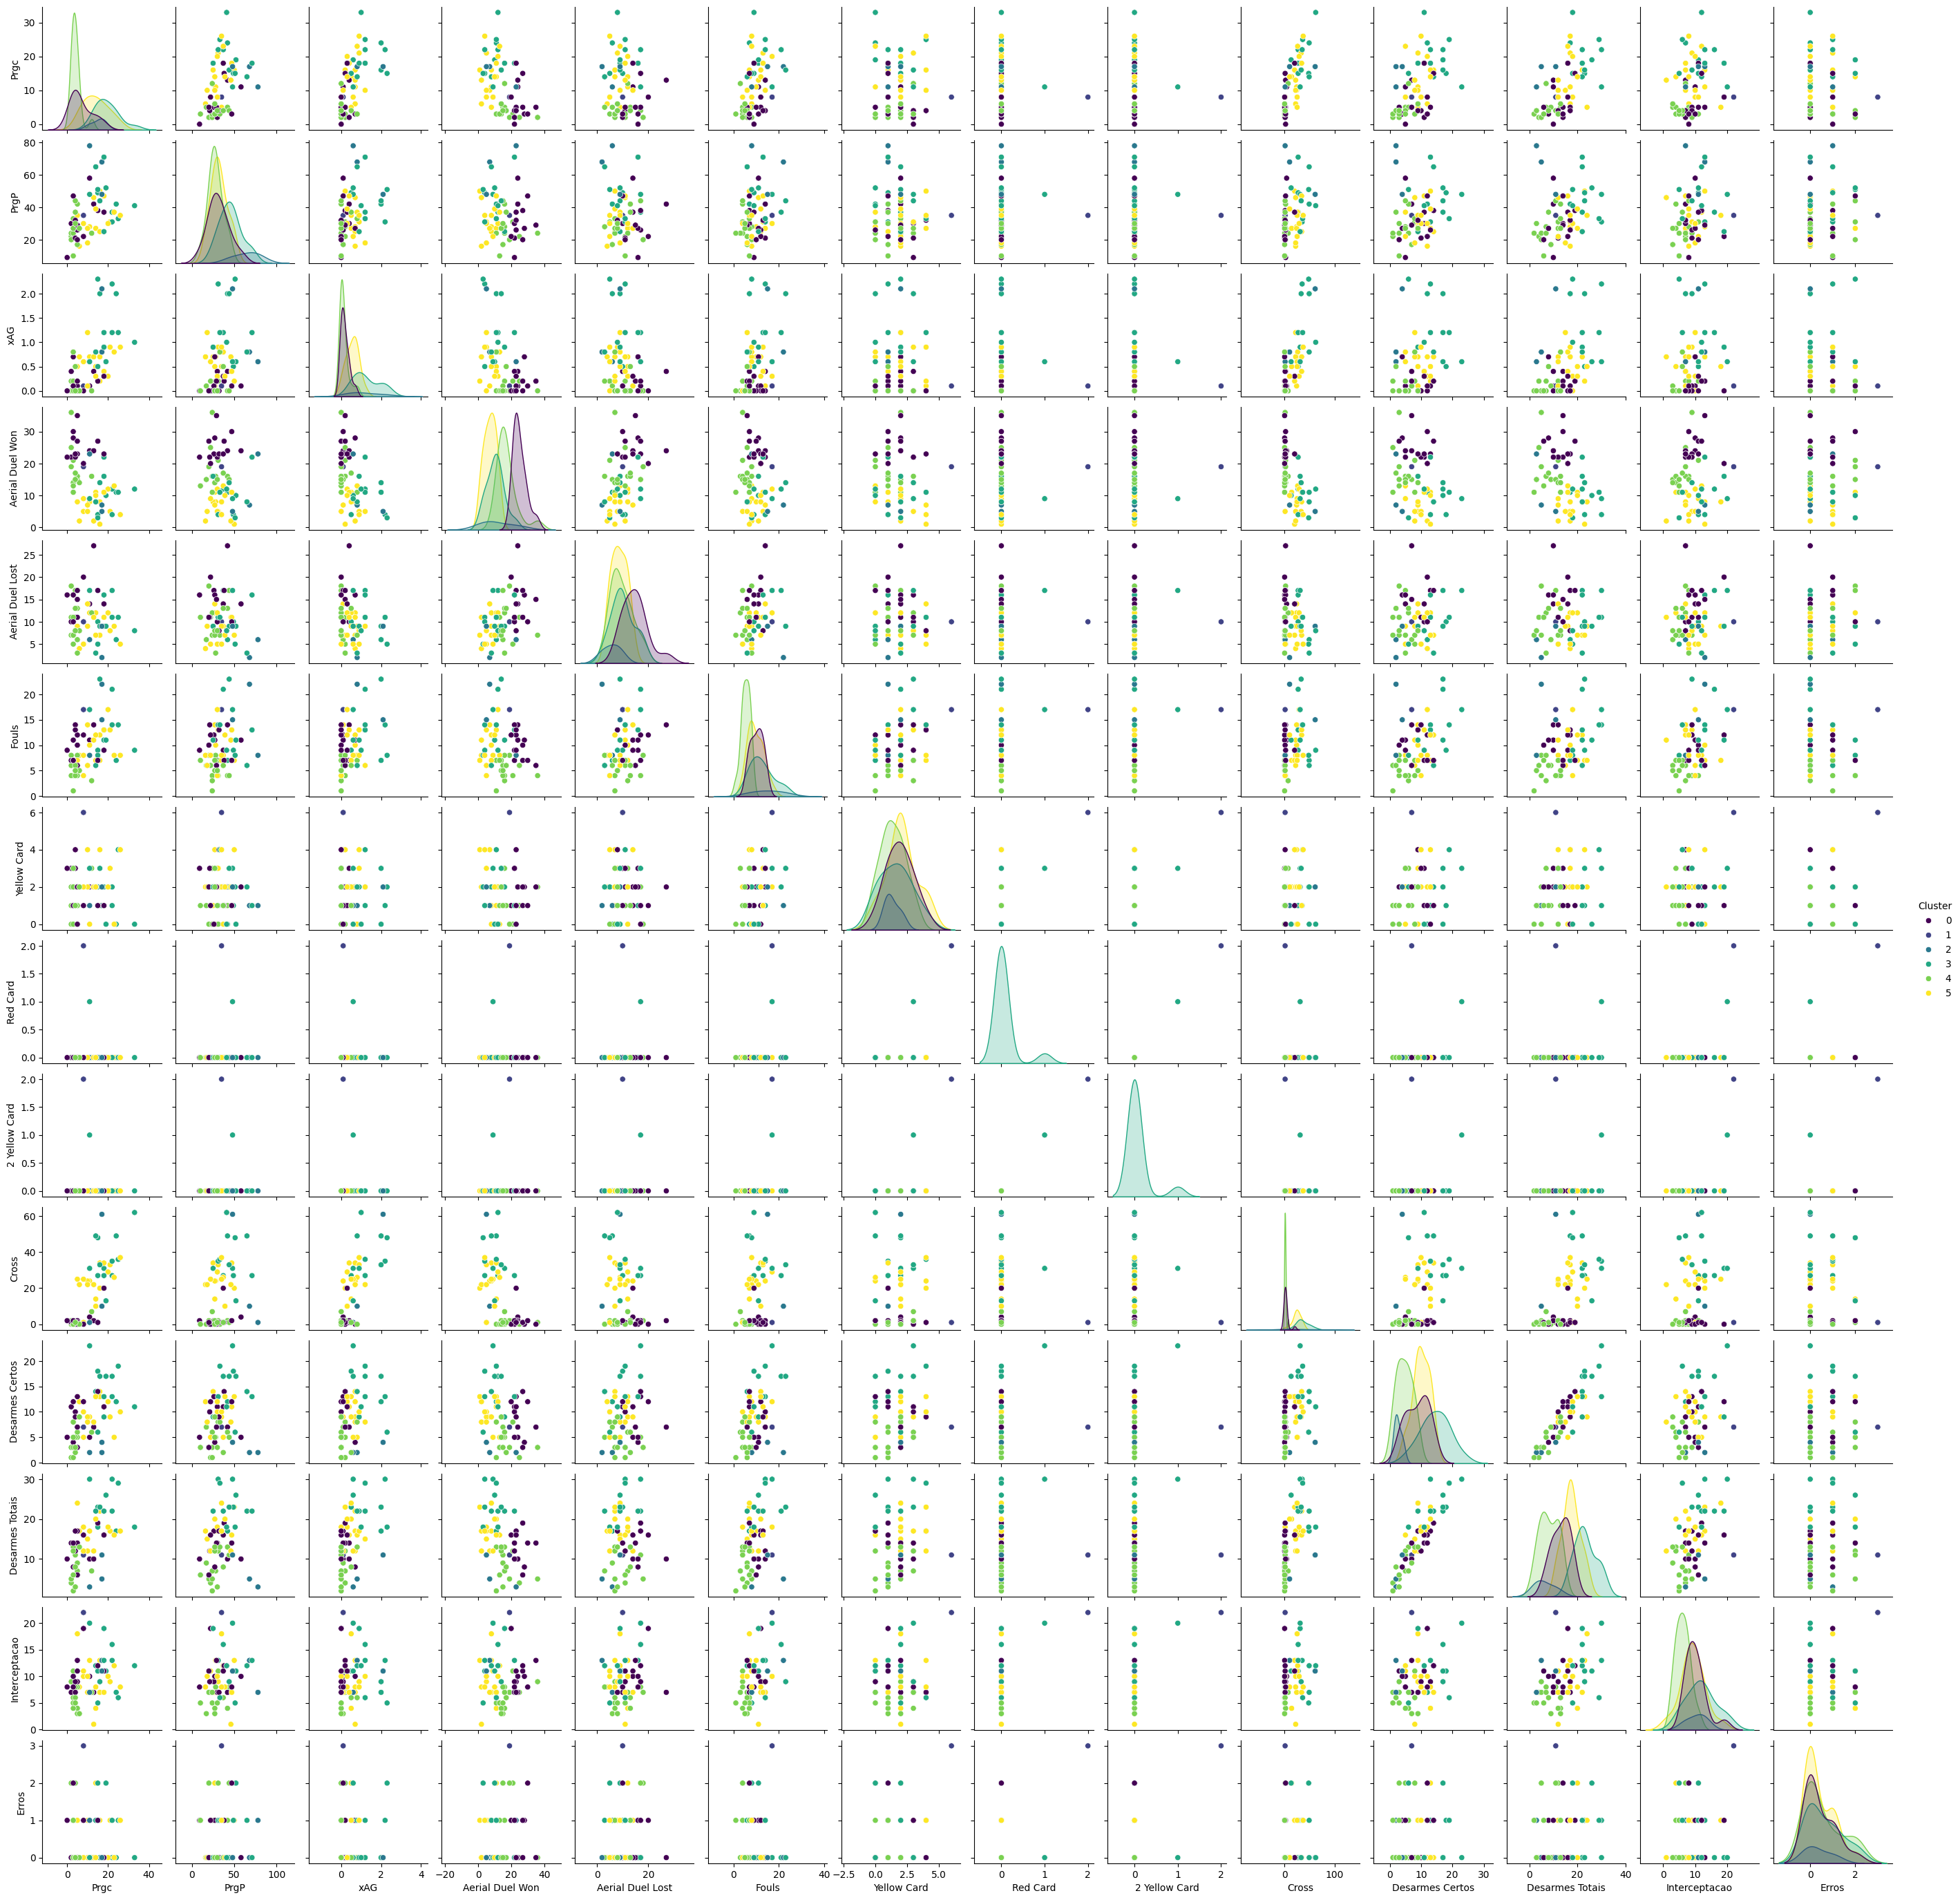

In [22]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['Prgc', 'PrgP','xAG','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Interceptacao','Erros','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Lat[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Comportamento de Variáveis e Distribuição de Clusters para Laterais**

---

### **1. Análise de Correlações com Insights**

## 📈 Correlações Fortes (r > 0.70)

- `Dis` & `Tkl`: **0.90**  
  → Quanto maior o número de desarmes certos (`Tackles`), maior o número de desarmes totais tentados. Indica consistência defensiva.

- `Cross` & `xAG`: **0.80**  
  → Mais cruzamentos tendem a gerar maior expectativa de assistência. São laterais ofensivos que criam chances reais.

- `Tkl` & `Int`: **0.76**  
  → Jogadores que desarmam bem também costumam interceptar jogadas, mostrando bom posicionamento defensivo.

- `Cross` & `PrgC`: **0.71**  
  → Quanto mais conduções progressivas, mais cruzamentos — laterais ofensivos que progridem com bola e cruzam.

---

## ⚖️ Correlações Moderadas (0.50 ≤ r < 0.70)

- `Dis` & `Int`: **0.69**  
  → Indica que laterais que interceptam também se envolvem em desarmes — contribuições defensivas complementares.

- `PrgP` & `Cross`: **0.63**  
  → Passes progressivos tendem a resultar em cruzamentos, mostrando contribuição na construção ofensiva pelas pontas.

- `Dis` & `Cross`: **0.58**  
  → Laterais que desarmam mais também cruzam mais, indicando perfil híbrido (defensivo + ofensivo).

- `Tkl` & `Aerial Duel Won`: **0.57**  
  → Laterais fortes nos desarmes também são eficazes nos duelos aéreos.

- `PrgP` & `xAG`: **0.52**  
  → Passes progressivos tendem a gerar assistências esperadas, reforçando o papel criador dos laterais armadores.

---

## 🚫 Correlações Negativas Relevantes (r < -0.50)

- `Total_Cards_` & `Cross`: **-0.54**  
  → Laterais que cruzam mais tendem a receber menos cartões. Isso pode indicar que laterais mais ofensivos cometem menos faltas de contenção.

- `Tkl` & `xAG`: **-0.51**  
  → Laterais mais defensivos (com muitos desarmes) têm menor ex


---

### **2. Perfis dos Clusters com Médias**

## 🧩 Análise de Clusters – Laterais da Série A (2024)

Os laterais foram agrupados em **6 clusters** com base em métricas defensivas, ofensivas e de construção. A seguir, a descrição de cada grupo com base na visualização do gráfico `Heatmap`.

---

### 🟣 Cluster 0 (Roxo escuro)  
🧱 **Laterais defensivos e intensos no desarme**  
- Altos valores em **Dis**, **Tkl** e **Intercepções**  
- Envolvimento defensivo muito alto, com ações constantes sem a bola  
- Baixa contribuição em **xAG** e cruzamentos

🛡️ *Perfil de laterais marcadores*, com foco na proteção e combate. São peças fundamentais na sustentação defensiva.

---

### 🟦 Cluster 1 (Azul claro / Ciano)  
🔁 **Laterais com participação equilibrada**  
- Valores medianos em todas as métricas  
- Contribuem com **Cross**, **Dis**, **PrgC** e **Int**, mas sem destaque em nenhuma dimensão  
- Atuam bem nas duas fases, mas sem números extremos

⚖️ *Perfil de laterais polivalentes*, que se adaptam às exigências do jogo. São regulares e constantes.

---

### 🟡 Cluster 2 (Amarelo)  
🎯 **Laterais ofensivos e criativos**  
- Altos índices de **Cross**, **xAG** e **PrgC**  
- Participam ativamente da construção ofensiva e na criação de chances  
- Menor envolvimento em ações defensivas

🚀 *Perfil de laterais construtores*, com grande capacidade de apoiar o ataque. Peças chave no terço final.

---

### 🟤 Cluster 3 (Verde-musgo / Azul-esverdeado)  
🧊 **Laterais de transição e apoio tático**  
- Valores medianos-baixos em quase todas as métricas  
- Sem grande destaque ofensivo ou defensivo, mas contribuem para o coletivo  
- Baixa incidência de cartões

⚙️ *Perfil de suporte tático*, auxiliam na organização e no equilíbrio da equipe. Úteis em contextos estratégicos.

---

### 🟩 Cluster 4 (Verde)  
🛠️ **Laterais técnicos e associativos**  
- Altos valores em **PrgP**, **passPA** e **crossPA**  
- Excelentes na construção de jogadas e no apoio pelo corredor  
- Defendem razoavelmente bem e cruzam com frequência

🧠 *Perfil de organizadores laterais*, com leitura de jogo e precisão no passe. São facilitadores da posse e da criação.

---

### 🔵 Cluster 5 (Azul escuro)  
⏳ **Baixa minutagem ou pouco impacto**  
- Baixíssimos valores em todas as métricas  
- Pode indicar atletas reservas, lesionados ou com participação limitada na temporada

📉 *Grupo fora do eixo estatístico principal*, exigindo mais contexto para avaliação real.




In [30]:
cluster_names = {
    0: 'Laterais marcadores',
    1: 'Laterais polivalentes',
    2: 'Laterais construtores',
    3: 'Laterais apoio',
    4: 'Laterais associativos',
    5: 'Laterais sr',
}

# Adicionar nomes ao DataFrame
Lat['Perfil'] = Lat['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Lat[['jogador','time','posicao','idade', 'Minutos', 'Prgc', 'PrgP','xAG','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros','Perfil']].head())

          jogador              time posicao   idade  Minutos  Prgc  PrgP  xAG  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros                 Perfil
13  Júnior Alonso  Atlético Mineiro      DF  32-117      922    11    58  0.1          63.2               24                14     11            2         0              0      4                5               10       50.0             10      0    Laterais marcadores
15         Lyanco  Atlético Mineiro      DF  28-125      718     8    35  0.1          65.5               19                10     17            6         2              2      1                7               11       63.6             22      3  Laterais polivalentes
16       Natanael  Atlético Mineiro      DF  23-152      803    11    28  0.7          40.0                8                12     10            0         0              0     24               

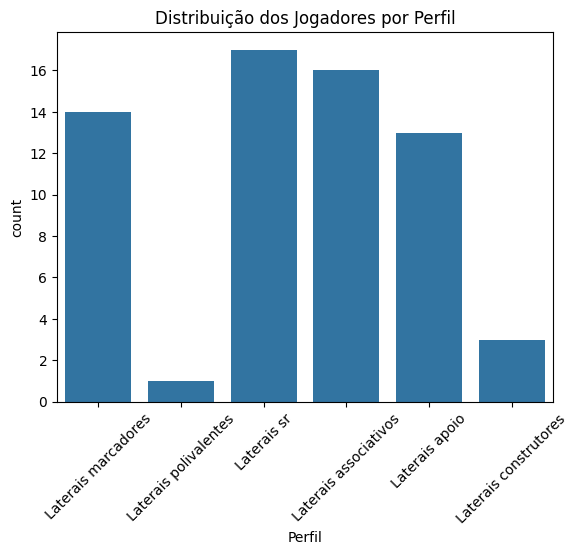

In [31]:
sns.countplot(data=Lat, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [32]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Lat[Lat['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'Prgc', 'PrgP','xAG','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "Laterais apoio"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: Laterais apoio
                jogador           time posicao   idade  Minutos  Prgc  PrgP  xAG  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros
39         Luciano Juba          Bahia      DF  25-281      894    24    42  2.0          64.7               11                 6      7            0         0              0     49               12               17       70.6              7      0
143               Kaiki       Cruzeiro      DF  22-090      984    22    37  1.2          41.4               12                17     21            2         0              0     27               17               22       77.3             16      0
273  Alexandro Bernabei  Internacional      DF  24-255      710    22    31  2.2          26.7                4                11     14            1         0              0     35               13               30 

In [33]:
# Dicionário dos peso para cada métrica
pesos = {
    'Prgc': 2,
    'PrgP': 2,
    'xAG' : 10,
    'Fouls': -3,
    'Yellow Card': -5,
    'Red Card': -10,
    'Cross': 10,
    'Desarmes Certos': 10,
    'Interceptacao' : 5,
    'Erros' : -2,

}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Lat[coluna + '_Pontuacao'] = Lat[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Lat['Pontuacao_Total'] = Lat[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Lat['Pontuacao_Total'].min()
max_pontuacao = Lat['Pontuacao_Total'].max()
Lat['Pontuacao'] = (
    (Lat['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'Laterais marcadores'
jogadores_filtrados = Lat[Lat['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: Laterais marcadores
 Ranking             time posicao           jogador              Perfil  Pontuacao
       1     Sport Recife      DF       Igor Cariús Laterais marcadores  45.276498
       2     Sport Recife      DF             Chico Laterais marcadores  27.304147
       3    Vasco da Gama      DF       João Victor Laterais marcadores   22.81106
       4 Atlético Mineiro      DF     Júnior Alonso Laterais marcadores  21.082949
       5         Mirassol      DF            Jemmes Laterais marcadores   20.62212
       6        Fortaleza      DF Benjamín Kuscevic Laterais marcadores  19.470046
       7         Cruzeiro      DF    Fabrício Bruno Laterais marcadores  15.437788
       8            Bahia      DF Santi Ramos Mingo Laterais marcadores  15.437788
       9    RB Bragantino      DF    Pedro Henrique Laterais marcadores  14.285714
      10           Santos      DF         Zé Ivaldo Laterais marcadores    10.9447
      11           Grêmio      DF 

In [34]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'Laterais associativos'  # Defina o perfil desejado
jogadores_filtrados = Lat[Lat['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'Laterais associativos': ['David Duarte', 'Jair Paula', 'Marllon Borges', 'Willian Machado', 'André Ramalho', 'Cacá', 'Lucas Villalba', 'Léo Pereira', 'Juan Freytes', 'Thiago Silva', 'Vitão', 'Guzmán Rodríguez', 'João Silva', 'Alan Franco', 'Lucas Halter', 'Zé Marcos']
Digite o nome do jogador (ou 'sair' para finalizar): sair

Ranking de jogadores por eficiência de valor:
 Ranking          jogador  Valor de Mercado (€M)  Pontuacao  Custo por Ponto (€M)  Score de Valor
       1     David Duarte                    NaN    2.18894                  <NA>            <NA>
       2       Jair Paula                    NaN   17.97235                  <NA>            <NA>
       3   Marllon Borges                    NaN   5.529954                  <NA>            <NA>
       4  Willian Machado                    NaN   7.142857                  <NA>            <NA>
       5    André Ramalho                    NaN   8.179724                  <NA>            <NA>
     


Jogadores selecionados: Alexandro Bernabei
                jogador           time posicao   idade  Minutos  Prgc  PrgP  xAG  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros
273  Alexandro Bernabei  Internacional      DF  24-255      710    22    31  2.2          26.7                4                11     14            1         0              0     35               13               30       43.3             13      1


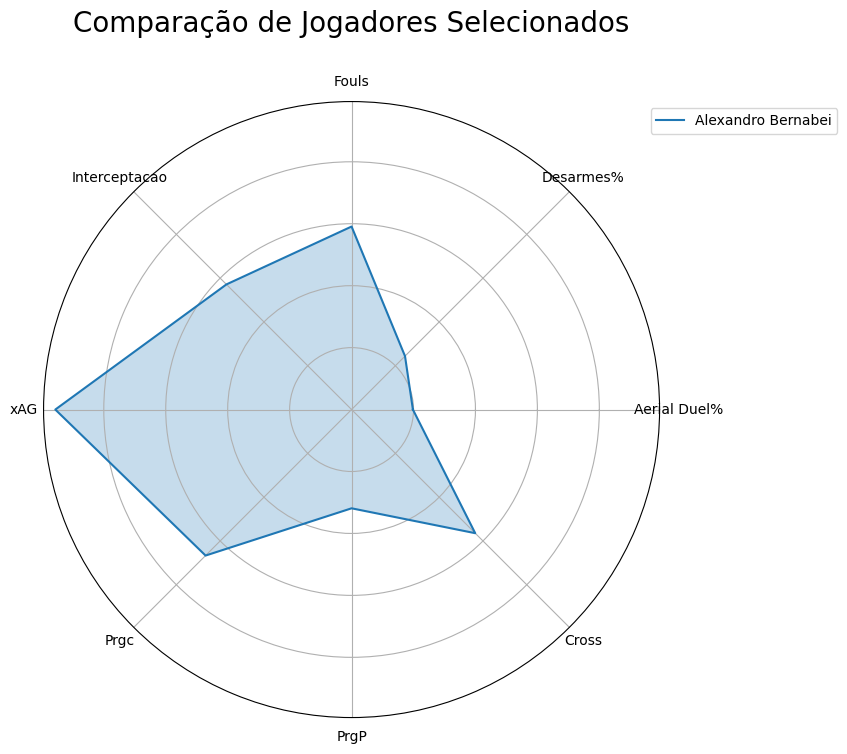

In [28]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'Prgc', 'PrgP','xAG','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['Aerial Duel%', 'Desarmes%', 'Fouls', 'Interceptacao','xAG','Prgc', 'PrgP','Cross',]
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Luciano Juba', 'uninho Capixaba','William','Alexandro Bernabei']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Lat)